In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
import seaborn as sns
# Import necessary classifiers
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier


# Load dataset
train_df = pd.read_csv('/content/mnist_train.csv')
test_df = pd.read_csv('/content/mnist_test.csv')
display(train_df.head())
display(test_df.head())




0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      7  
1    0      2  
2    0      1  
3    0      0  
4    0      4  

[5 rows x 785 columns]

In [8]:
# Split features and labels
X_train = train_df.drop(columns=["label"]).values  # Pixel values
y_train = train_df["label"].values
X_test = test_df.drop(columns=["label"]).values
y_test = test_df["label"].values

# Normalize data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Logistic Regression Accuracy: 0.9216
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.87       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



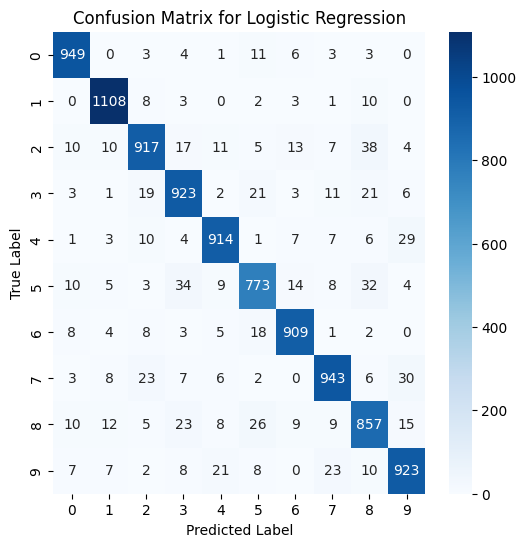

k-Nearest Neighbors Accuracy: 0.9443
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



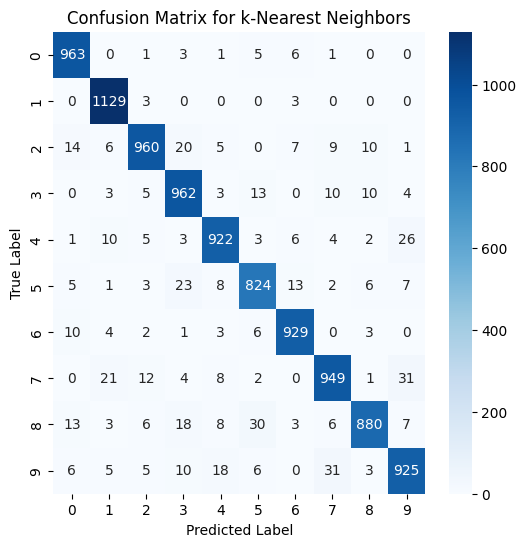

Decision Tree Accuracy: 0.8767
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.83      0.83      0.83       892
           6       0.89      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.86      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



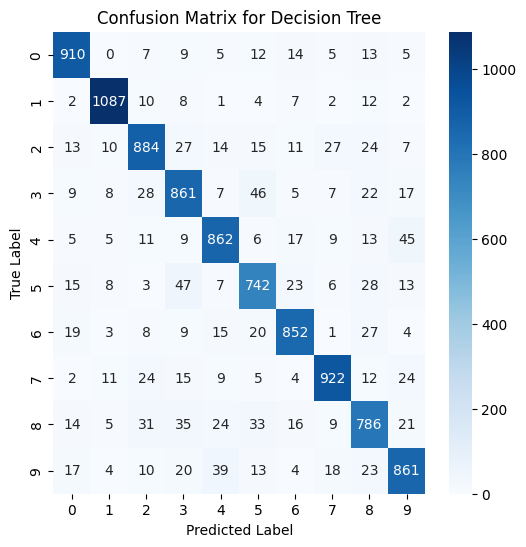

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9770
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



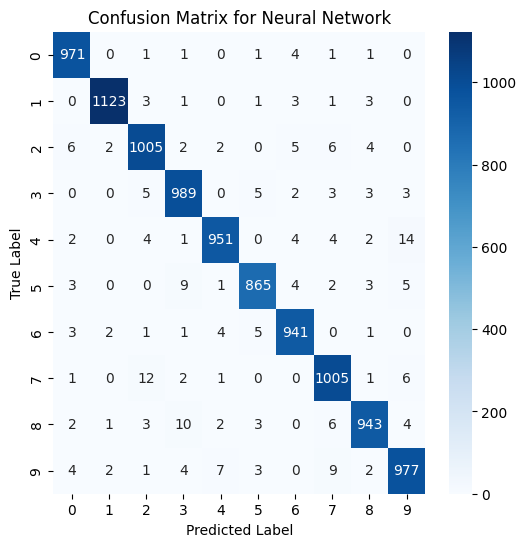

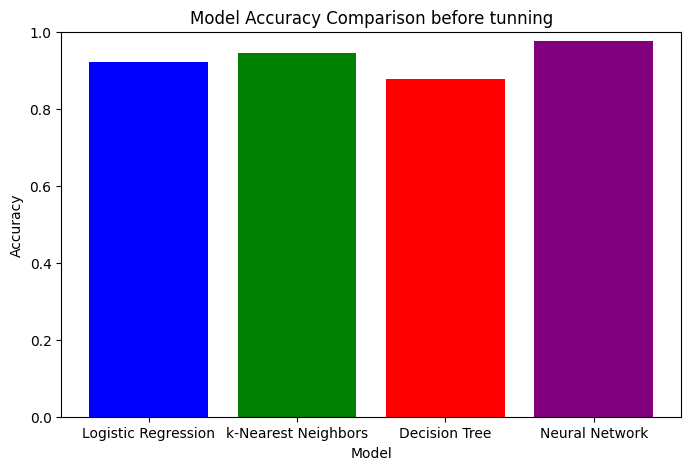

In [26]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20)
}

# Initialize accuracies dictionary
accuracies = {}  # Create an empty dictionary to store accuracies

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy # Store accuracy for the current model
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Plot accuracy as a bar graph (moved outside the loop)
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison before tunning')
plt.ylim(0, 1)
plt.show()



Hyperparameter tuning for Logistic Regression...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters for Logistic Regression: {'C': 0.1}
Logistic Regression Best Accuracy: 0.8972

Hyperparameter tuning for KNN...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'n_neighbors': 5}
KNN Best Accuracy: 0.8917

Hyperparameter tuning for Decision Tree...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Decision Tree: {'max_depth': 10}
Decision Tree Best Accuracy: 0.7775

Hyperparameter tuning for Neural Network...
Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Neural Network: {'hidden_layer_sizes': (256, 128), 'activation': 'relu'}
Neural Network Best Accuracy: 0.9343


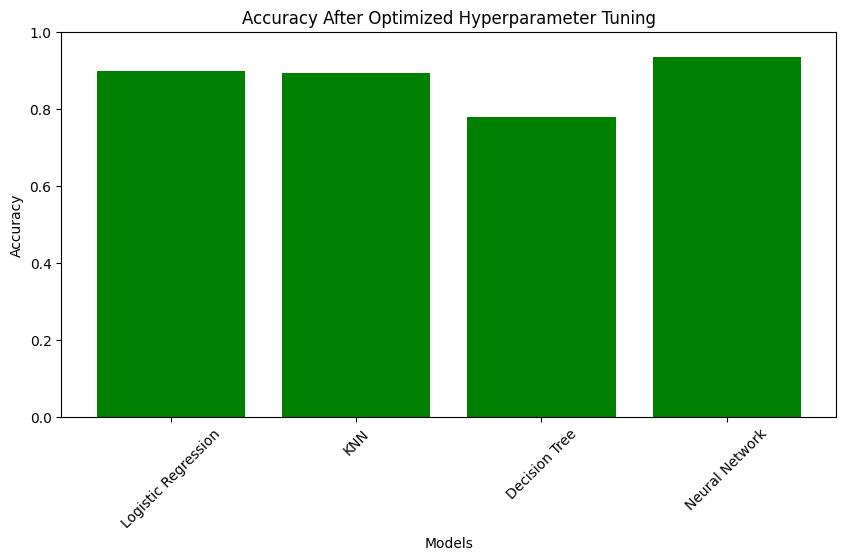

In [27]:

# Hyperparameter tuning with smaller dataset
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

# Define new models
models_tuned = {
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=50)
}

# Define hyperparameter grid
param_grids = {
    "Logistic Regression": {"C": [0.1, 1]},
    "KNN": {"n_neighbors": [3, 5]},
    "Decision Tree": {"max_depth": [10, 20]},
    "Neural Network": {"hidden_layer_sizes": [(128, 64), (256, 128)], "activation": ["relu", "tanh"]}
}

best_models = {}
best_accuracies = {}

# Hyperparameter tuning using RandomizedSearchCV
# Removed the unnecessary initializations of grid_search and RandomizedSearchCV
for name, model in models_tuned.items():
    print(f"\nHyperparameter tuning for {name}...")
    # Apply RandomizedSearchCV only if hyperparameters exist
    if param_grids[name]:
        grid_search = RandomizedSearchCV(model, param_distributions=param_grids[name],
                                         n_iter=5, cv=2, scoring="accuracy", n_jobs=-1, verbose=1, random_state=42) # Added random_state for reproducibility
        grid_search.fit(X_train_small, y_train_small)
        best_model = grid_search.best_estimator_
        best_accuracy = grid_search.best_score_  # Get the best accuracy from the search
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        # This 'else' block is likely unnecessary and can be removed
        # as you are already defining hyperparameters for all models in param_grids.
        pass

    best_models[name] = best_model
    best_accuracies[name] = best_accuracy  # Store the best accuracy
    print(f"{name} Best Accuracy: {best_accuracy:.4f}")

# Plot accuracy comparison after tuning
plt.figure(figsize=(10, 5))
plt.bar(best_accuracies.keys(), best_accuracies.values(), color='green')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy After Optimized Hyperparameter Tuning")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


In [25]:
# Find the model with the highest accuracy
best_model_name = max(best_accuracies, key=best_accuracies.get)
best_model_accuracy = best_accuracies[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

The best model is: Neural Network with an accuracy of 0.9339
